# Aplicação de Redes Neurais (keras) para  problemas de NLP


***

## Modelo 2 (Rede Neural): Classificação de SPAM 

A idéia é criar um modelo que consiga responder se determinado e-mail é ou não um **spam**.

Para isso, são necessários dados de e-mails que foram *preciamente* classificado, para, desta forma criar um modelo de redes neurais que irá aprender com esses dados.

### Pipeline

A *pipeline* contará com os seguintes passos:

- Importação dos dados (e Análise Descritiva);

- Tratamento de Dados;

- Criação do modelo;

- Avaliação de Performance.

### Importação dos Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder 
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.metrics import AUC

sns.set()
warnings.filterwarnings("ignore")

In [2]:
# Obtendo dados
dados_emails = pd.read_csv(r'..\Datasets\spam_ham_dataset.csv', index_col = 0)
dados_emails.head(2)

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0


In [3]:
# Renomeando Rótulos
dados_emails['label'].loc[dados_emails['label']=='ham'] = 'valido'

### Análise Descritiva

Qual o percentual de cada classe?

In [4]:
# Contagem das classes
dados_emails.label.value_counts()

label
valido    3672
spam      1499
Name: count, dtype: int64

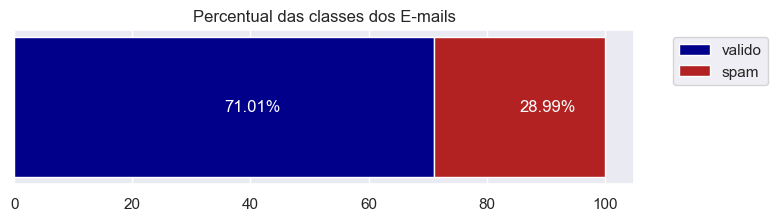

In [5]:
# Representação visual das classes
prop = dados_emails.label.value_counts()
perc = [v / prop.sum() * 100 for v in prop]
acumulado = 0

# inicializando figura
plt.figure(figsize=(8, 2))
plt.yticks([])

# Plotando a barras de spam e validos
for i, v in enumerate(perc):
    plt.barh('Emails', v, left=acumulado, color=['darkblue', 'firebrick'][i], height=0.5)
    acumulado += v  


# Texto
acumulado = 0
for i, v in enumerate(perc):
    plt.text(acumulado + v / 2, 'Emails', f'{v:.2f}%', va='center', color='white')
    acumulado += v 


plt.legend(prop.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Percentual das classes dos E-mails')
plt.show()

### Tratamento de Dados

In [6]:
# Separacao treino/teste
X_treino, X_teste, y_treino, y_teste = train_test_split(dados_emails['text'], dados_emails['label_num'], test_size = .3, random_state=42)

In [7]:
# Vetorizando as palavras do conjunto de treino
vetorizador = CountVectorizer()
vetorizador.fit(X_treino)

CountVectorizer()

In [8]:
# Transformando os conjuntos
X_treino = vetorizador.transform(X_treino)
X_teste = vetorizador.transform(X_teste)

### Criação do modelo

In [9]:
# Iniciando o modelo
model = Sequential()

# Camada de entrada
model.add(Dense(units=10,
                activation='relu',
                input_dim=X_treino.shape[1], # Tamanho da camada de entrada deve ser igual ao número de variaveis (palavras)
               ))

# Camada de dropout
model.add(Dropout(0.1)) # Remoção de sinapses para evitar overfitting

# Nova camada
model.add(Dense(units=5))

# Camada de dropout
model.add(Dropout(0.1))

# Camada de saída
model.add(Dense(units=1,
               activation='sigmoid')) # Por se tratar de um valor entre 0 e 1

In [10]:
model.compile(loss="binary_crossentropy", # Parametro que irá quantificar o modelo (será minimizado)
              optimizer="adam", # Otimizador baseado na descida do gradiente estocastica
              metrics=["accuracy", AUC(name="auc")]) 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │         414,370 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 414,431 (1.58 MB)

 Trainable params: 414,431 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Treinando a rede neural
model.fit(X_treino,
          y_treino,
          epochs=10,
          batch_size=10,
          verbose=True,
          validation_data=(X_teste, y_teste))

Epoch 1/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8763 - auc: 0.9382 - loss: 0.2892 - val_accuracy: 0.9871 - val_auc: 0.9983 - val_loss: 0.0580
Epoch 2/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9944 - auc: 0.9999 - loss: 0.0313 - val_accuracy: 0.9897 - val_auc: 0.9992 - val_loss: 0.0353
Epoch 3/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9982 - auc: 0.9972 - loss: 0.0100 - val_accuracy: 0.9903 - val_auc: 0.9994 - val_loss: 0.0295
Epoch 4/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9996 - auc: 1.0000 - loss: 0.0081 - val_accuracy: 0.9890 - val_auc: 0.9993 - val_loss: 0.0309
Epoch 5/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9994 - auc: 1.0000 - loss: 0.0050 - val_accuracy: 0.9916 - val_auc: 0.9983 - val_loss: 0.0284
Epoch 6/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9999 - auc: 1.0000 - loss: 0.0032 - val_accuracy: 0.9762 - val_auc: 0.9940 - val_loss: 0.1077
Epoch 7/10
362/362 ━━━━━━━━━━━━━━━━━━━━ 

### Avaliação de Performance

In [12]:
# Avaliando desempenho
loss, accuracy, roc = model.evaluate(X_teste, y_teste)
print(f"\nLoss:", round(((loss)*100),2))
print("Acurácia:", round(((accuracy)*100),2))
print("Área sob a curva ROC:", round(((roc)*100),2))

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - auc: 0.9959 - loss: 0.0572

Loss: 5.65
Acurácia: 98.26
Área sob a curva ROC: 99.74


In [13]:
# Realizando previsoes
prev = model.predict(X_teste)

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [14]:
# Definindo 0,71 de cutoff
prev_cutoff = np.where(prev>0.71,1,0)

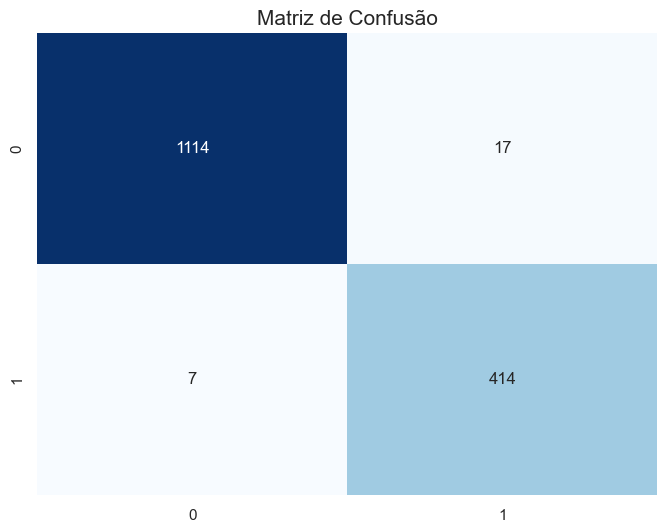

In [15]:
# Representação Gráfica da Matriz de confusao
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(prev_cutoff, y_teste),
            annot=True, fmt='d', cmap='Blues',
            cbar=False)
plt.title('Matriz de Confusão', size=15)
plt.show()

Conforme podemos observar, temos poucos casos de erros:

- Dos 1121 casos de e-mails válidos, o modelo classificou 1114 (**99,4%**) corretamente;

- Dos 431 casos de spam, o modelo classificou 414 (**96,0%**) corretamente.

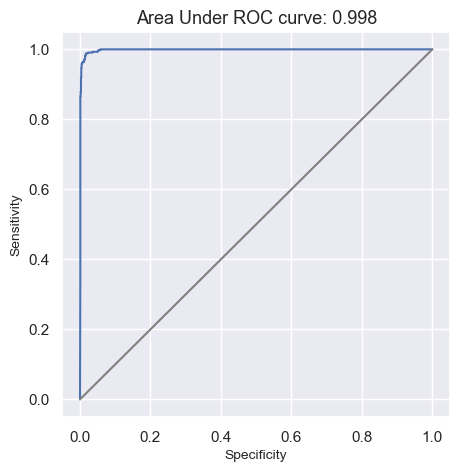

In [16]:
# Área sob a curva roc
fpr, tpr, thresholds = roc_curve(y_teste, prev)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(fpr,fpr, color='gray')
plt.title(f"Area Under ROC curve: {round(roc_auc,3)}", fontsize=13)
plt.xlabel("Specificity", fontsize=10)
plt.ylabel("Sensitivity", fontsize=10)
plt.show()

O modelo apresentou uma AUC de **0.998**. Esse valor indica uma performance excelente, de forma que o modelo de redes neurais teve uma alta capacidade para distinguir entre spams e e-mail válidos.